# H&M Personalized Fashion Recommendations

### Dataset Source: Kaggle
### Link: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations

### Overview

H&M Group is a family of brands and businesses with 53 online markets and approximately 4,850 stores. Our online store offers shoppers an extensive selection of products to browse through. But with too many choices, customers might not quickly find what interests them or what they are looking for, and ultimately, they might not make a purchase. To enhance the shopping experience, product recommendations are key. More importantly, helping customers make the right choices also has a positive implications for sustainability, as it reduces returns, and thereby minimizes emissions from transportation.

In this competition, H&M Group invites you to develop product recommendations based on data from previous transactions, as well as from customer and product meta data. The available meta data spans from simple data, such as garment type and customer age, to text data from product descriptions, to image data from garment images.

There are no preconceptions on what information that may be useful – that is for you to find out. If you want to investigate a categorical data type algorithm, or dive into NLP and image processing deep learning, that is up to you.

### Dataset Description:

For this challenge you are given the purchase history of customers across time, along with supporting metadata. Your challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

Files
* images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.
* articles.csv - detailed metadata for each article_id available for purchase
* customers.csv - metadata for each customer_id in dataset
* sample_submission.csv - a sample submission file in the correct format
* transactions_train.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.

In [10]:
import numpy as np
import pandas as pd
import boto3
import matplotlib.pyplot as plt
import seaborn as sns

## transactions_train.csv

In [11]:
bucket='ads-508-group-6-raw'
data_key = 'transactions_train.csv'

s3 = boto3.client('s3')
transactions_obj = s3.get_object(Bucket = bucket, Key = data_key)

transactions_df = pd.read_csv(transactions_obj['Body'])

In [12]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [17]:
transactions_df.info

<bound method DataFrame.info of                t_dat                                        customer_id  \
0         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1         2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
3         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
4         2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
...              ...                                                ...   
31788319  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788320  2020-09-22  fff2282977442e327b45d8c89afde25617d00124d0f999...   
31788321  2020-09-22  fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...   
31788322  2020-09-22  fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...   
31788323  2020-09-22  fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...   

          article_id     price  sales_channel_id  
0          66371

In [18]:
transactions_df.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [13]:
transactions_df.shape

(31788324, 5)

In [14]:
transactions_df.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

### Categorical EDA

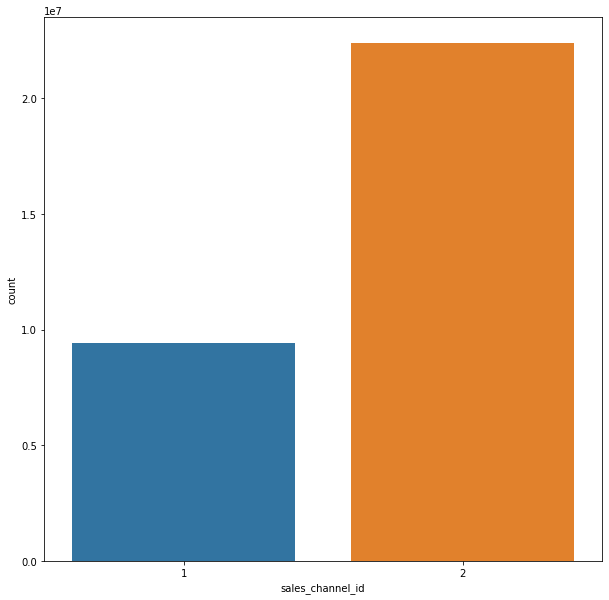

In [15]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data = transactions_df, x = 'sales_channel_id')

In [16]:
print(transactions_df.sales_channel_id.value_counts(normalize = True))

2    0.704028
1    0.295972
Name: sales_channel_id, dtype: float64


### Numerical EDA

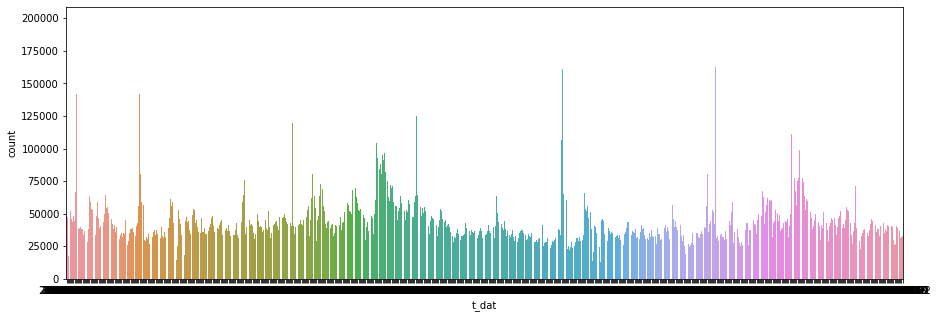

In [19]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = transactions_df, x = 't_dat')

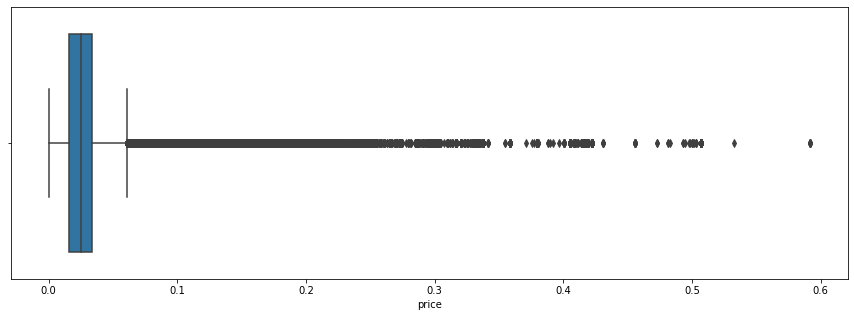

In [20]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = transactions_df, x = 'price')

## customers.csv

In [21]:
bucket='ads-508-group-6-raw'
data_key = 'customers.csv'

s3 = boto3.client('s3')
customers_obj = s3.get_object(Bucket = bucket, Key = data_key)

customers_df = pd.read_csv(customers_obj['Body'])

In [22]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [23]:
customers_df.info

<bound method DataFrame.info of                                                customer_id   FN  Active  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
...                                                    ...  ...     ...   
1371975  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  NaN     NaN   
1371976  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  NaN     NaN   
1371977  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  1.0     1.0   
1371978  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  1.0     1.0   
1371979  ffffd9ac14e89946416d80e791d064701994755c3ab686...  NaN     NaN   

        club_member_status fashion_news_frequency   age  \
0       

In [24]:
customers_df.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [25]:
customers_df.shape

(1371980, 7)

In [26]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

### Categorical EDA

TBC

### Numerical EDA

TBC

## articles.csv

In [27]:
bucket='ads-508-group-6-raw'
data_key = 'articles.csv'

s3 = boto3.client('s3')
articles_obj = s3.get_object(Bucket = bucket, Key = data_key)

articles_df = pd.read_csv(articles_obj['Body'])

In [29]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [30]:
articles_df.info

<bound method DataFrame.info of         article_id  product_code               prod_name  product_type_no  \
0        108775015        108775               Strap top              253   
1        108775044        108775               Strap top              253   
2        108775051        108775           Strap top (1)              253   
3        110065001        110065       OP T-shirt (Idro)              306   
4        110065002        110065       OP T-shirt (Idro)              306   
...            ...           ...                     ...              ...   
105537   953450001        953450  5pk regular Placement1              302   
105538   953763001        953763       SPORT Malaga tank              253   
105539   956217002        956217         Cartwheel dress              265   
105540   957375001        957375        CLAIRE HAIR CLAW               72   
105541   959461001        959461            Lounge dress              265   

       product_type_name  product_group_nam

In [31]:
articles_df.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [32]:
articles_df.shape

(105542, 25)

In [33]:
articles_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

### Categorical EDA

TBC

### Numerical EDA

TBC

### Shutting Down Kernel To Release Resources

In [ ]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [ ]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}